In [22]:
from CNTools.datasets import Dataset
import statsmodels.api as sm
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import pickle
import sys
sys.path.insert(0, '..')

In [23]:
patient_col = 'Sample'
image_col = 'Image'
neigh_col = 'CN'
ct_col = 'CT'

In [24]:
# CRC:

# ds = pickle.load(open('../data/CRC/CRC_ds.pkl', 'rb'))
# df = pd.read_csv('../data/CRC/CRC_df.csv')
# cells = ['Treg-PD-1+', 'Treg-Ki67+', 'Treg-ICOS+', 'CD8+PD-1+', 'CD8+Ki67+', 'CD8+ICOS+', 'CD4+PD-1+', 'CD4+Ki67+', 'CD4+ICOS+']
# df[ct_col] = [cells[i] for i in np.argmax(df[cells].to_numpy(), axis=1)]

# Uncomment one of these results on CRC

# nbs = [0, 1, 2, 3, 4, 5, 6, 7, 8]
# cns = pickle.load(open('../cn/CRC/CF-IDF/cns_n_cns=9_eps=32.0_r=0.8_max_neighbors=-1_exclude_cts=[]_seed=0_Naive_3.pkl', 'rb'))
# ind = ['CN-1: Macrophage enriched', 'CN-2: Macrophage & mixed cell enriched', 'CN-3: Smooth muscle', 'CN-4: Granulocyte enriched', 'CN-5: T cell enriched', 'CN-6: Undefined cell enriched', 'CN-7: Immune cell / vasculature enriched', 'CN-8: Immune-infiltrated stroma', 'CN-9: Bulk tumor']

# nbs = [0, 1, 2, 3, 4, 5, 6, 7]
# cns = pickle.load(open('../cn/CRC/CNE/cns_n_cns=9_perp=15_lam=0.25_naive.pkl', 'rb'))
# ind = ['CN-1: Vasculature & stroma', 'CN-2: Macrophage enriched', 'CN-3: Smooth muscle', 'CN-4: Bulk tumor', 'CN-5: Granulocyte enriched', 'CN-6: Immune cell enriched', 'CN-7: Plasma cell enriched', 'CN-8: T cell enriched', 'CN-9: Follicle']

# nbs = [0, 1, 3, 4, 5, 6, 7, 8]
# cns = pickle.load(open('../cn/CRC/Spatial LDA/cns_n_cns=9_eps=50.0_b=0.025_train_size_fraction=0.99_n_processes=8_Naive_3.pkl', 'rb'))
# ind = ['CN-1: Granulocyte enriched', 'CN-2: Immune-infiltrated stroma & tumor boundary', 'CN-3: Follicle', 'CN-4: T cell enriched', 'CN-5: Smooth muscle', 'CN-6: Vasculature, macrophage & plasma enriched', 'CN-7: Undefined cell enriched', 'CN-8: Macrophage & T cell enriched', 'CN-9: Bulk tumor']


# T2D:

ds = pickle.load(open('../data/T2D/T2D_ds.pkl', 'rb'))
df = pd.read_csv('../data/T2D/T2D_df.csv')
cells = ds.ct_order
df_cells = np.zeros((len(df), len(cells)), dtype='int')
df_cells[[i for i in range(len(df))], [cells.index(i) for i in df[ct_col]]] = 1
df[cells] = df_cells

# Uncomment one of these results on T2D

# nbs = [0, 1, 2, 3, 4, 5]
# cns = pickle.load(open('../cn/T2D/CC/cns_n_cns=6_m=5_exclude_cts=[]_seed=0_HMRF_45.0_9.0.pkl', 'rb'))
# ind = ['CN-1: Beta cell enriched', 'CN-2: Alpha & beta cell enriched', 'CN-3: Alpha cell enriched', 'CN-4: Endothelial cell enriched', 'CN-5: Alpha & mixed cell enriched', 'CN-6: Delta, gamma & macrophage cell enriched']

nbs = [0, 1, 2, 3, 4, 5]
cns = pickle.load(open('../cn/T2D/CNE/cns_n_cns=6_perp=15_lam=0.25_naive.pkl', 'rb'))
ind = ['CN-1: Delta cell enriched', 'CN-2: Beta cell enriched', 'CN-3: Gamma cell enriched', 'CN-4: Endothelial cell enriched', 'CN-5: Alpha cell enriched', 'CN-6: Macrophage enriched']

# nbs = [0, 1, 2, 3, 4, 5]
# cns = pickle.load(open('../cn/T2D/Spatial LDA/cns_n_cns=6_eps=100.0_b=0.25_train_size_fraction=0.989_n_processes=8_Naive_3.pkl', 'rb'))
# ind = ['CN-1: Endothelial cell enriched', 'CN-2: Beta cell enriched', 'CN-3: Alpha cell enriched', 'CN-4: Gamma cell enriched', 'CN-5: Delta cell enriched', 'CN-6: Alpha, macrophage & endothelial cell enriched']


# ind = [i.split(':')[0] for i in ind]

In [25]:
group_id = {'ND': 0, 'T2D': 1, 'CLR': 0, 'DII': 1}
group, patients = [], []
for g, samples in ds.group2sample.items():
    group += [group_id[g]] * len(samples)
    patients += samples
group = pd.Series(group)

In [26]:
df[neigh_col] = 0
for sample, df_sample in df.groupby(patient_col, sort=False):
    for image, df_image in df_sample.groupby(image_col, sort=False):
        df.loc[df_image.index, neigh_col] = cns[sample][image]
cells2 = pd.DataFrame(df, columns=cells + [ct_col, neigh_col, patient_col])
cells2

,Alpha cells,Delta cells,Beta cells,Gamma cells,Epsilon cells,T cells,Macrophages,Other immune cells,Endothelial cells,Pericytes,CT,CN,Sample
0,1,0,0,0,0,0,0,0,0,0,Alpha cells,1,ABI2259
1,0,0,1,0,0,0,0,0,0,0,Beta cells,1,ABI2259
2,1,0,0,0,0,0,0,0,0,0,Alpha cells,1,ABI2259
3,1,0,0,0,0,0,0,0,0,0,Alpha cells,1,ABI2259
4,0,0,1,0,0,0,0,0,0,0,Beta cells,1,ABI2259
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66318,0,0,0,1,0,0,0,0,0,0,Gamma cells,2,AFCM451
66319,0,0,0,0,0,0,0,0,1,0,Endothelial cells,2,AFCM451
66320,0,0,0,1,0,0,0,0,0,0,Gamma cells,2,AFCM451
66321,0,0,0,1,0,0,0,0,0,0,Gamma cells,2,AFCM451


In [27]:
'''
preparing dataframes (best to do this on your data):
ct_freq should be a df of cell type frequencies per patient

all_freqs should have cols patient, neighborhood, cell types, giving
the frequency of cells of that type in that neighborhood in that patient
'''
ct_freq = cells2.groupby(patient_col).apply(lambda x: x[ct_col].value_counts()).unstack().reset_index()
all_freqs = cells2.groupby([patient_col, neigh_col]).apply(lambda x: x[ct_col].value_counts()).unstack().reset_index()

In [28]:
def normalize(X):
    arr = np.array(X.fillna(0).values)
    return pd.DataFrame(np.log2(1e-3 + arr/arr.sum(axis =1, keepdims = True)), index = X.index.values, columns = X.columns).fillna(0)

In [29]:
# data prep
# normalized overall cell type frequencies
X_cts = normalize(ct_freq.set_index(patient_col).loc[patients,cells])

# normalized neighborhood specific cell type frequencies
df_list = []

for nb in nbs:
    cond_nb = all_freqs.loc[all_freqs[neigh_col]==nb,[patient_col] + cells].rename({col: col+'_'+str(nb) for col in cells},axis = 1).set_index(patient_col)
    df_list.append(normalize(cond_nb))

X_cond_nb = pd.concat(df_list,axis = 1).loc[patients]

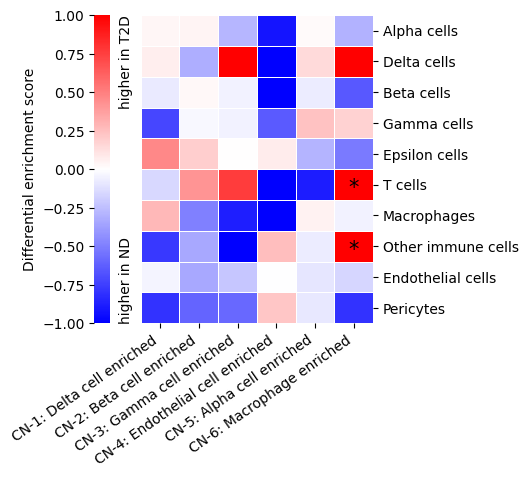

In [30]:
#differential enrichment for all cell subsets
changes = {}
for col in cells:
    for nb in nbs:
        #build a design matrix with a constant, group 0 or 1 and the overall frequencies
        X = pd.concat([X_cts.reset_index()[col], group.astype('int'),pd.Series(np.ones(len(group)), index = group.index.values)],axis = 1).values
        if col+'_%d'%nb in X_cond_nb.columns:
            #set the neighborhood specific ct freqs as the outcome
            Y = X_cond_nb[col+'_%d'%nb].values
            X = X[~pd.isna(Y)]
            Y = Y[~pd.isna(Y)]
            #fit a linear regression model
            results = sm.OLS(Y,X).fit()
            #find the params and pvalues for the group coefficient
            changes[(col,nb)] = (results.pvalues[1], results.params[1])

#make a dataframe with coeffs and pvalues
dat = (pd.DataFrame(changes).loc[1].unstack())
dat = pd.DataFrame(np.nan_to_num(dat.values),index = dat.index, columns = dat.columns).T.sort_index(ascending=True).loc[:,X_cts.columns]
dat = dat.rename(index={i: ind[i] for i in nbs})
pvals = (pd.DataFrame(changes).loc[0].unstack()).T.sort_index(ascending=True).loc[:,X_cts.columns]

#this is where you should correct pvalues for multiple testing 


#plot as heatmap
plt.figure(figsize=(4, 4))

ax = sns.heatmap(dat.T, cmap='bwr', vmin=-1, vmax=1, linewidths=0.5, cbar_kws={'location': 'left', 'label': 'Differential enrichment score'}) # 'pad': 0.05
ax.yaxis.set_ticks_position('right')
ax.tick_params(axis='y', labelrotation=0)
plt.xticks(rotation=35, ha='right')

ax2 = ax.collections[0].colorbar.ax

ax3 = ax2.secondary_yaxis('right')
ax3.spines['right'].set_visible(False)
ax3.set_yticks([1])
ax3.set_yticklabels(['higher in T2D'], rotation=90, va='top')
ax3.tick_params(right=False)

ax4 = ax2.secondary_yaxis('right')
ax4.spines['right'].set_visible(False)
ax4.set_yticks([-1])
ax4.set_yticklabels(['higher in ND'], rotation=90, va='bottom')
ax4.tick_params(right=False)

for a,b in zip(*np.where(pvals<0.05)):
    hh = plt.text(a+.5, b+.6, '*', fontsize=15, ha='center', va='center')

plt.savefig('../analysis_res/T2D/CNE/diff' + '.pdf', bbox_inches='tight')